In [3]:
pip install tifffile

Note: you may need to restart the kernel to use updated packages.


In [1]:
from medpy.io import load

In [2]:
import numpy as np
from tifffile import imsave
import matplotlib.pyplot as plt

import glob
import nibabel as nib
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [3]:
tf.version

<module 'tensorflow._api.v2.version' from 'C:\\Users\\profe\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>

In [4]:
Scaler=StandardScaler()
Scaler1=MinMaxScaler()

In [5]:
# combining all volumes to generate numpy array


In [6]:
Data_path="/Users/profe/Downloads/BraTS-2015/BRATS2015_Training/BRATS2015_Training/"

In [7]:
test_image_flair,image_data=load(Data_path+"HGG/Brats_2013_pat0001_1/VSD.Brain.XX.O.MR_Flair.54512/VSD.Brain.XX.O.MR_FLair.54512.mha")
#test_imageflair=test_image_flair.get_fdata()

print(test_image_flair.shape)


(240, 240, 155)


In [8]:
print(test_image_flair.min())
print(test_image_flair.max())

0
1273


In [9]:
test_image_flair.shape[-1]

155

In [10]:
#MinMaxScaler scale feature in 1d array
# so we need to reshape our image to get data
#test_imageflair=Scaler.fit_transform(test_imageflair.reshape(-1,test_imageflair.shape[-1])).reshape(test_imageflair.shape)
scalers={}
for i in range(test_image_flair.shape[1]):
    scalers[i] = MinMaxScaler()
    test_image_flair[:, i, :] = scalers[i].fit_transform(test_image_flair[:, i, :]) 


In [11]:
test_image_flair.min()

0

In [12]:
#test_image_flair.reshape(test_image_flair.shape)

In [13]:
print(test_image_flair.max())
print(test_image_flair.shape)

1
(240, 240, 155)


In [14]:
# so our image is scaled between 0 and 1
test_image_t1,img_t1=load(Data_path+"HGG/Brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T1.54513/VSD.Brain.XX.O.MR_T1.54513.mha")
print(test_image_t1.shape)
test_image_t1=Scaler1.fit_transform(test_image_t1.reshape(-1,test_image_t1.shape[-1])).reshape(test_image_t1.shape)
print(test_image_t1.shape)

(240, 240, 155)
(240, 240, 155)


In [17]:
#(test_image_t1.reshape(test_image_t1.shape))
print(test_image_t1.min())
print(test_image_t1.max())


0.0
1.0


In [18]:
print(test_image_t1.shape)

(240, 240, 155)


In [19]:
test_image_t1ce,img_t1c=load(Data_path+"HGG/Brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T1c.54514/VSD.Brain.XX.O.MR_T1c.54514.mha")
print(test_image_t1ce.shape)
test_image_t1ce=Scaler1.fit_transform(test_image_t1ce.reshape(-1,test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

(240, 240, 155)


In [20]:
#test_image_t1ce.reshape(test_image_t1ce.shape)

In [21]:
print(test_image_t1ce.shape)
#(test_image_t1ce)

(240, 240, 155)


In [22]:
test_image_t2,t2=load(Data_path+"HGG/Brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T2.54515/VSD.Brain.XX.O.MR_T2.54515.mha")
print(test_image_t2.shape)
test_image_t2=Scaler1.fit_transform(test_image_t2.reshape(-1,test_image_t2.shape[-1])).reshape(test_image_t2.shape)

(240, 240, 155)


In [23]:
t2

In [24]:
#test_image_t2.reshape(test_image_t2.shape)

In [25]:
print(test_image_t2.shape)

(240, 240, 155)


In [26]:

#

In [37]:
print(test_image_t2.dtype)
print(test_image_t2.shape)


float64
(240, 240, 155)


In [96]:
test_mask,m=load(Data_path+"HGG/Brats_2013_pat0001_1/VSD.Brain_3more.XX.O.OT.54517/VSD.Brain_3more.XX.O.OT.54517.mha")
#test_mask=test_mask.astype(np.uint8)
test_mask=test_mask.astype(np.float64)
print(test_mask.shape)

(240, 240, 155)


In [70]:
m

In [71]:
print(np.unique(test_mask))

[0. 1. 2. 3. 4.]


In [72]:
#test_mask[test_mask==4]=3# reassign mask value to 0 1 2 3
#print(np.unique(test_mask))

In [73]:
# upto here we modified our image to array


In [74]:
import random

In [75]:
test_mask.dtype

dtype('float64')

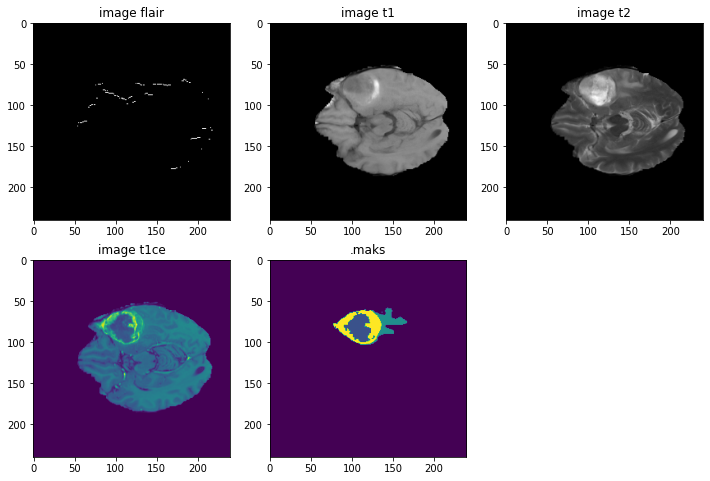

In [77]:
image_slice=random.randint(0,test_mask.shape[1])

plt.figure(figsize=(12,8))
plt.subplot(231)
plt.imshow(test_image_flair[:,:,image_slice],cmap='gray')
plt.title('image flair')
plt.subplot(232)
plt.imshow(test_image_t1[:,:, image_slice ],cmap='gray')
plt.title('image t1')
plt.subplot(233)
plt.imshow(test_image_t2[:,:,image_slice ],cmap='gray')
plt.title('image t2')
plt.subplot(234)
plt.imshow(test_image_t1ce[:,:, image_slice ])
plt.title('image t1ce')
plt.subplot(235)
plt.imshow(test_mask[:,:,image_slice])
plt.title('.maks')
plt.show()

In [78]:
test_image_flair[
:,:image_slice
]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [79]:
combine=np.stack([test_image_flair,test_image_t2,test_image_t1ce],axis=3)

In [80]:
combine_x=combine[56:184,56:184,13:141]

In [81]:
combine_x.shape
#print(combine_x.dtype)

(128, 128, 128, 3)

In [97]:
test_mask=test_mask[56:184,56:184,13:141]

In [98]:
test_mask.shape
#print(test_mask.dtype)

(128, 128, 128)

In [103]:
test_image_flair.shape

(240, 240, 155)

In [107]:
image_slice=random.randint(0,test_mask.shape[2])

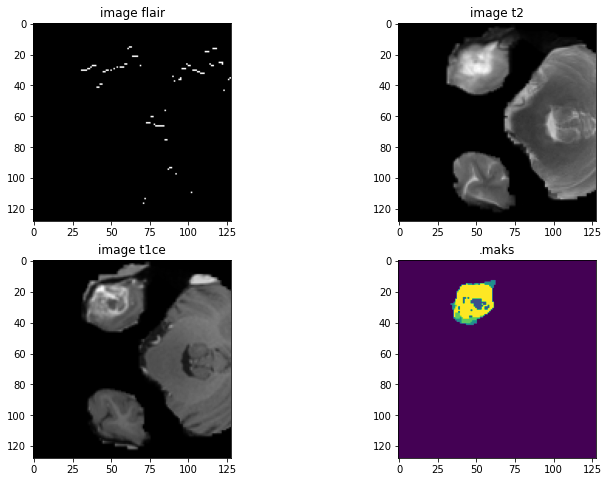

In [108]:
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.imshow(combine_x[:,:, image_slice,0],cmap='gray')
plt.title('image flair')
plt.subplot(222)
#plt.imshow(combine_x[:,:, image_slice ,1],cmap='gray')
#plt.title('image t1')
#plt.subplot(223)
plt.imshow(combine_x[:,:,image_slice ,1],cmap='gray')
plt.title('image t2')
plt.subplot(223)
plt.imshow(combine_x[:,:, image_slice,2],cmap='gray')
plt.title('image t1ce')
plt.subplot(224)
plt.imshow(test_mask[:,:,image_slice])
plt.title('.maks')
plt.show()

In [109]:
imsave('C:/Users/profe/Downloads/BraTS-2015/BRATS2015_Training/combined_355.tif',combine_x)
np.save('C:/Users/profe/Downloads/BraTS-2015/BRATS2015_Training/combined_355',combine_x)#
#C:\Users\profe\Downloads\BraTS-2015\BRATS2015_Training/

C:\Users\profe\AppData\Local\Temp\ipykernel_9596\2008177276.py:1: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave('C:/Users/profe/Downloads/BraTS-2015/BRATS2015_Training/combined_355.tif',combine_x)


In [110]:
my_image=np.load('C:/Users/profe/Downloads/Music/BraTS2020_TrainingData/combined_355.npy')

In [111]:
my_image

array([[[[ 0.        , -0.15406632, -0.1535323 ],
         [ 0.        , -0.1714848 , -0.17135602],
         [ 0.        , -0.18864724, -0.18586019],
         ...,
         [ 0.        , -0.01647865, -0.01628833],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ]],

        [[ 0.        , -0.15406632, -0.1535323 ],
         [ 0.        , -0.1714848 , -0.17135602],
         [ 0.        , -0.18864724, -0.18586019],
         ...,
         [ 0.        , -0.01647865, -0.01628833],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ]],

        [[ 0.        , -0.15406632, -0.1535323 ],
         [ 0.        , -0.1714848 , -0.17135602],
         [ 0.        , -0.18864724, -0.18586019],
         ...,
         [ 0.        , -0.01647865, -0.01628833],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ]],

        ...,

        [[ 0.        , -0.15406632, -0

In [112]:
test_mask=to_categorical(test_mask,num_classes=5)

In [113]:
test_mask.shape

(128, 128, 128, 5)

In [114]:
t2_list=sorted(glob.glob('C:/Users/profe/Downloads/BraTS-2015/BRATS2015_Training/BRATS2015_Training/HGG/*/*/*T2.[0-9][0-9][0-9][0-9][0-9]*.mha'))

In [115]:
t1_list=sorted(glob.glob('C:/Users/profe/Downloads/BraTS-2015/BRATS2015_Training/BRATS2015_Training/HGG/*/*/*T1.[0-9][0-9][0-9][0-9][0-9]*.mha'))

In [116]:
t1ce_list=sorted(glob.glob('C:/Users/profe/Downloads/BraTS-2015/BRATS2015_Training/BRATS2015_Training/HGG/*/*/*T1c.[0-9][0-9][0-9][0-9][0-9]*.mha'))

In [117]:
flair_list=sorted(glob.glob('C:/Users/profe/Downloads/BraTS-2015/BRATS2015_Training/BRATS2015_Training/HGG/*/*/*Flair.[0-9][0-9][0-9][0-9][0-9]*.mha'))

In [118]:
mask_list=sorted(glob.glob('C:/Users/profe/Downloads/BraTS-2015/BRATS2015_Training/BRATS2015_Training/HGG/*/*/*OT.[0-9][0-9][0-9][0-9][0-9]*.mha'))

In [119]:
len(mask_list)

220

In [120]:
len(t2_list)

220

In [121]:
len(mask_list)

220

In [122]:
len(flair_list)

220

In [126]:
for img in range(len(t2_list)):
    print(" preparing for images and masks no. :",img)
    temp_image_t2,t2=load(t2_list[img])#.get_fdata()
    temp_image_t2=Scaler1.fit_transform(temp_image_t2.reshape(-1,temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
    
    temp_image_t1ce,t1ce=load(t1ce_list[img])#.get_fdata()
    temp_image_t1ce=Scaler1.fit_transform(temp_image_t1ce.reshape(-1,temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
    print(temp_image_t1ce)
    
    temp_image_flair,flair=load(flair_list[img])#.get_fdata()
    temp_image_flair=Scaler1.fit_transform(temp_image_flair.reshape(-1,temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
    
    temp_mask,mask=load(mask_list[img])#.get_fdata()
    temp_mask=temp_mask.astype(np.float32)
    #temp_mask[temp_mask==4]=3
    
    print(temp_mask)
    
    temp_combine_images=np.stack([temp_image_flair,temp_image_t2,temp_image_t1ce],axis=3)
    
    
    temp_combine_images=temp_combine_images[56:184,56:184,13:141]
    
    temp_mask=temp_mask[56:184,56:184,13:141]
    
    print(temp_mask.shape)
    
    val,counts=np.unique(temp_image_flair,return_counts=True)
    
    if(1-(counts[0]/counts.sum()))>0.01:
        # we want atleast
        print("save me")
        temp_mask=to_categorical(temp_mask,num_classes=5)
        print(temp_mask.shape)
        np.save('C:/Users/profe/Downloads/BraTS-2015/inputdata_4/images/image_'+str(img)+'',temp_combine_images)
        np.save('C:/Users/profe/Downloads/BraTS-2015/inputdata_4/masks/mask_'+str(img)+'',temp_mask)
    else:
        print("I am useless")
        
        
    
    
    
     

 preparing for images and masks no. : 0
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.

In [127]:
import splitfolders

In [128]:
input_folder='C:/Users/profe/Downloads/BraTS-2015/inputdata_4/'

In [129]:
output_folder='C:/Users/profe/Downloads/BraTS-2015/BRATS2015_Training/input_data/'

In [130]:
splitfolders.ratio(input_folder, output=output_folder,seed=42, ratio=(.75, .25,), group_prefix=None, move=False)

Copying files: 440 files [26:22,  3.60s/ files]
